In [1]:
import numpy as np, curvedsky, prjlib, plottools as pl, quad_func, binning as bn, tools_qrec
from matplotlib.pyplot import *

In [2]:
p0 = prjlib.init_analysis(wtype='Lmask',ascale=1.0,fltr='none')
p1 = prjlib.init_analysis(wtype='Lmask',ascale=1.0,fltr='cinv')
p2 = prjlib.init_analysis(wtype='Lmask',ascale=1.0,fltr='none',tausig=True)
p3 = prjlib.init_analysis(wtype='Lmask',ascale=1.0,fltr='cinv',tausig=True)
qtau0, qlen0, qsrc0, qtbh0, qtBH0 = tools_qrec.init_quad(p0.ids,p0.stag,rlmin=100,rlmax=2048)
qtau1, qlen1, qsrc1, qtbh1, qtBH1 = tools_qrec.init_quad(p1.ids,p1.stag,rlmin=100,rlmax=2048)
qtau2, qlen2, qsrc2, qtbh2, qtBH2 = tools_qrec.init_quad(p2.ids,p2.stag,rlmin=100,rlmax=2048)
qtau3, qlen3, qsrc3, qtbh3, qtBH3 = tools_qrec.init_quad(p3.ids,p3.stag,rlmin=100,rlmax=2048)

### Normalization

#### Comparison in terms of filtering

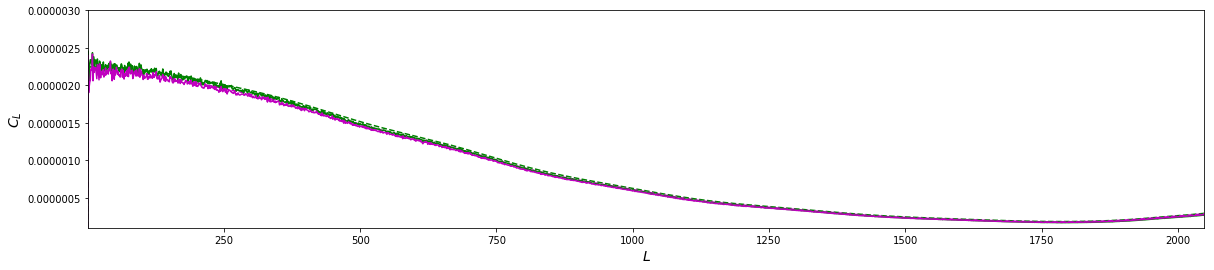

In [3]:
l, al0 = np.loadtxt(qtau0.f['TT'].al,unpack=True,usecols=(0,1))
l, al1 = np.loadtxt(qtau1.f['TT'].al,unpack=True,usecols=(0,1))
l, n00 = np.loadtxt(qtau0.f['TT'].n0bs,unpack=True,usecols=(0,1))
l, n01 = np.loadtxt(qtau1.f['TT'].n0bs,unpack=True,usecols=(0,1))
pl.plot_1dstyle(fsize=[20,4],ymin=1e-7,ymax=3e-6,xmin=1,xmax=2048)
plot(l,al0,'g--',label='norm (base)')
plot(l,al1,'m--',label='norm (cinv)')
plot(l,n00,'g-',label='N0 (base)')
plot(l,n01,'m-',label='N0 (cinv)')

#### Mean-field spectrum, raw spectrum and RDN0

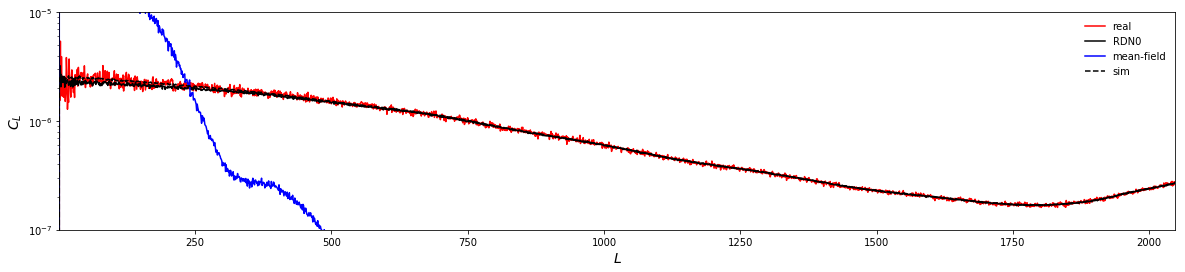

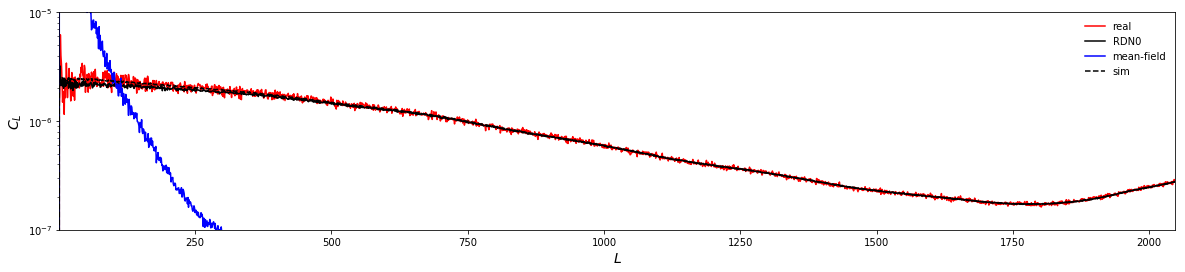

In [4]:
for qobj in [qtau0,qtau1]: 
    l, ml = np.loadtxt(qobj.f['TT'].ml[0],unpack=True,usecols=(0,1))
    l, cl = np.loadtxt(qobj.f['TT'].ocls,unpack=True,usecols=(0,1))
    l, sl = np.loadtxt(qobj.f['TT'].mcls,unpack=True,usecols=(0,1))
    l, rd = np.loadtxt(qobj.f['TT'].rdn0[0],unpack=True,usecols=(0,1))
    l, n0 = np.loadtxt(qobj.f['TT'].n0bs,unpack=True,usecols=(0,1))
    pl.plot_1dstyle(fsize=[20,4],ymin=1e-7,ymax=1e-5,xmin=1,xmax=2048,ylog=True)
    plot(l,cl-n0/100.,'r',label='real')
    plot(l,rd,'k',label='RDN0')
    plot(l,ml,'b',label='mean-field')
    plot(l,sl-n0/99.,'k--',label='sim')
    legend()
    show()

#### Cross with input

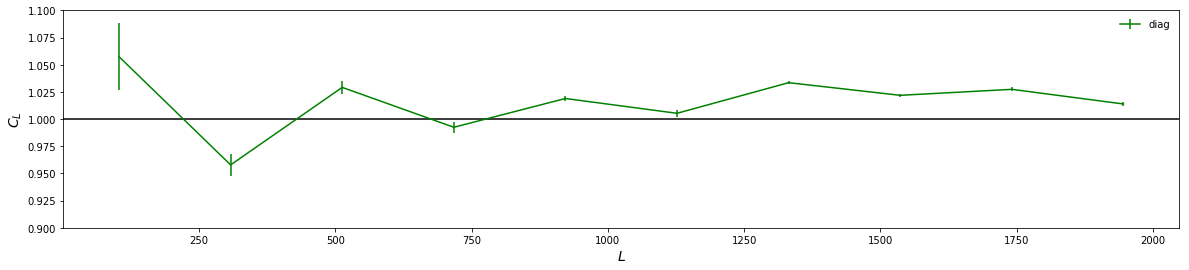

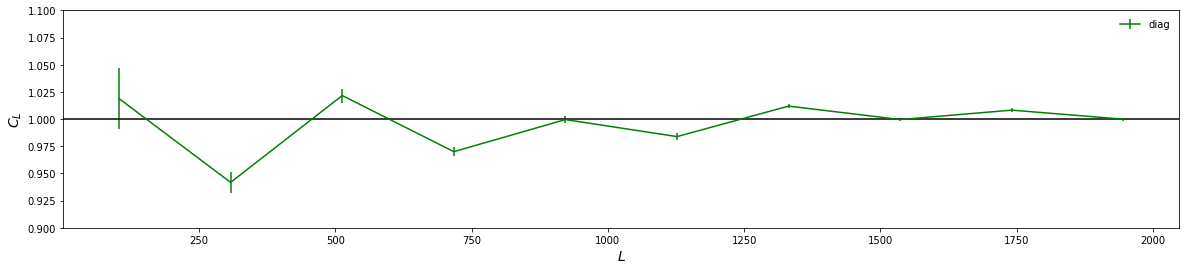

In [11]:
mb = bn.multipole_binning(10,lmin=1,lmax=2048)
for qobj in [qtau2,qtau3]:
    mxb, vxb, sxb = bn.binned_spec(mb,qobj.f['TT'].cl[:11],cn=2,doreal=False)
    mtb, vtb, stb = bn.binned_spec(mb,qobj.f['TT'].cl[:11],cn=3,doreal=False)
    pl.plot_1dstyle(fsize=[20,4],ymin=0.9,ymax=1.1,xmin=1,xmax=2048)
    errorbar(mb.bc,mxb/mtb,yerr=vxb/10./mtb,color='g',label='diag')
    axhline(1,color='k')
    #plot(mb.bc,mtb,'k--',label='input')
    legend()
    show()

#### Debiased spectrum

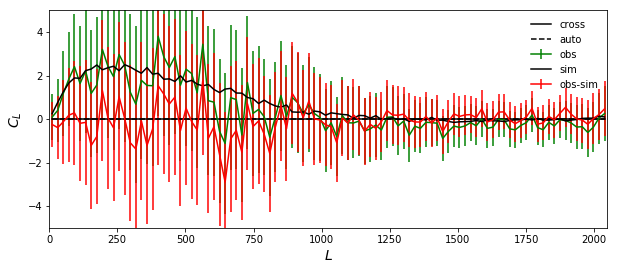

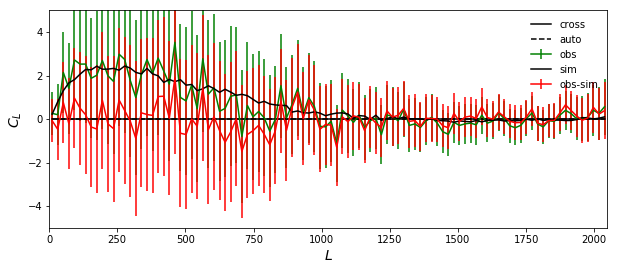

<Figure size 720x288 with 0 Axes>

In [6]:
for qobj in [qtau0,qtau1]: 
    mb = bn.multipole_binning(100,lmin=1,lmax=2048)
    l, ml = np.loadtxt(qobj.f['TT'].ml[0],unpack=True,usecols=(0,1))
    l, cl = np.loadtxt(qobj.f['TT'].ocls,unpack=True,usecols=(0,1))
    l, sl, xl, tt, vtt = np.loadtxt(qobj.f['TT'].mcls,unpack=True,usecols=(0,1,2,3,4))
    l, n0 = np.loadtxt(qobj.f['TT'].n0bs,unpack=True,usecols=(0,1))
    l, rd = np.loadtxt(qobj.f['TT'].rdn0[0],unpack=True,usecols=(0,1))
    cb = bn.binning(cl,mb)
    sb = bn.binning(sl,mb)
    nb = bn.binning(n0,mb)
    rb = bn.binning(rd,mb)
    vb = bn.binning(vtt,mb)
    s = mb.bc * 1e5
    pl.plot_1dstyle(fsize=[10,4],ymin=-5.,ymax=5,xmin=1,xmax=2048)
    errorbar(mb.bc,s*(cb-nb-nb/100.),color='g',yerr=s*vb,label='obs')
    errorbar(mb.bc,s*(sb-nb-nb/99.),color='k',label='sim')
    errorbar(mb.bc,s*(cb-rb-nb/100.-(sb-nb-nb/99.)),color='r',yerr=s*vb,label='obs-sim')
    xb = bn.binning(xl,mb)
    tb = bn.binning(tt,mb)
    plot(mb.bc,xb,'k',label='cross')
    plot(mb.bc,tb,'k--',label='auto')
    legend()
    show()
    clf()

## Lensing-hardened tau spectrum

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


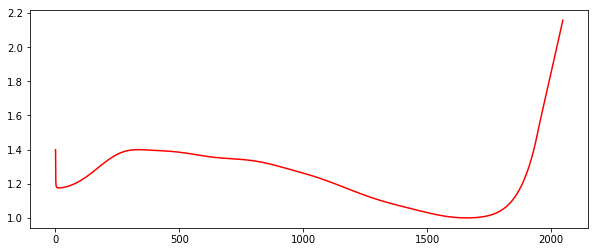

In [7]:
l, al0 = np.loadtxt(qtau0.f['TT'].al,unpack=True,usecols=(0,1))
l, al1 = np.loadtxt(qtbh0.f['TT'].al,unpack=True,usecols=(0,1))
plot(l,al1/al0,'r',label='real')

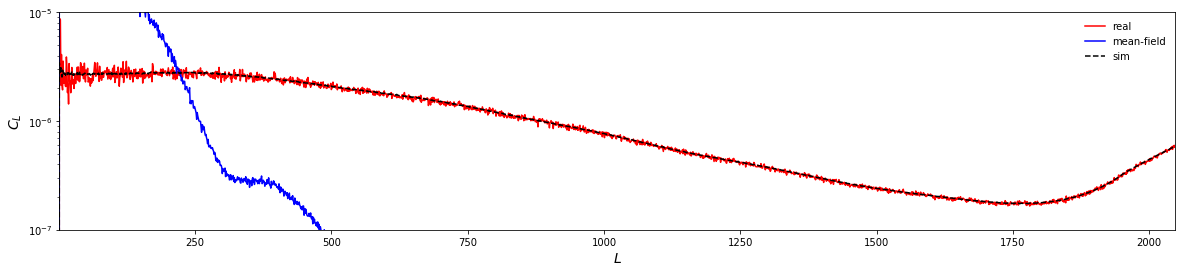

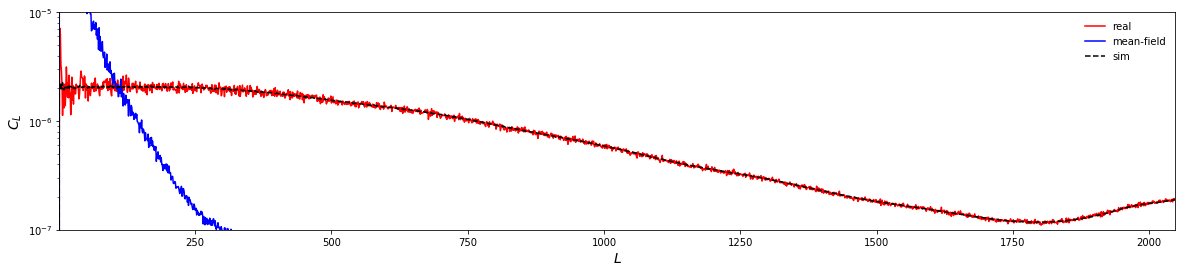

In [8]:
for qobj in [qtbh0,qtbh1]: 
    l, ml = np.loadtxt(qobj.f['TT'].ml[0],unpack=True,usecols=(0,1))
    l, cl = np.loadtxt(qobj.f['TT'].ocls,unpack=True,usecols=(0,1))
    l, sl = np.loadtxt(qobj.f['TT'].mcls,unpack=True,usecols=(0,1))
    pl.plot_1dstyle(fsize=[20,4],ymin=1e-7,ymax=1e-5,xmin=1,xmax=2048,ylog=True)
    plot(l,cl,'r',label='real')
    plot(l,ml,'b',label='mean-field')
    plot(l,sl,'k--',label='sim')
    legend()
    show()

In [9]:
for qobj in [qtbh2,qtbh3]: 
    l, xl, tt = np.loadtxt(qobj.f['TT'].mcls,unpack=True,usecols=(0,2,3))
    pl.plot_1dstyle(fsize=[20,4],ymin=5e-11,ymax=1e-9,xmin=1,xmax=2048,ylog=True)
    plot(l,xl,'g',label='real')
    plot(l,tt,'g--',label='real')
    Lc = 2000
    plot((1e-4)*4.*np.pi/Lc**2*np.exp(-(l/Lc)**2))
    legend()
    show()

OSError: /global/cscratch1/sd/toshiyan/plk/tau/aps/cl_TT_bh_dr2_smica_Lmask_a1.0deg_none_tausig_l100-2048.dat not found.